In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('data.csv', delimiter=',', encoding='ISO-8859-1')

In [3]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175445 entries, 0 to 175444
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    175445 non-null  object 
 1   StockCode    175445 non-null  object 
 2   Description  174707 non-null  object 
 3   Quantity     175445 non-null  int64  
 4   InvoiceDate  175445 non-null  object 
 5   UnitPrice    175445 non-null  float64
 6   CustomerID   123156 non-null  float64
 7   Country      175444 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 10.7+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,175445.0,9.169415,256.389246,-74215.0,1.00,3.00,10.00,74215.00
UnitPrice,175445.0,5.107800,100.467326,0.0,1.25,2.25,4.21,16888.02
CustomerID,123156.0,15286.333715,1728.637427,12346.0,13842.00,15179.00,16833.00,18283.00


In [6]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,738
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,52289
Country,1


In [7]:
data.shape

(175445, 8)

In [8]:
data.dropna(inplace=True)

In [9]:
data = data[data['Quantity'] > 0]
data[data['UnitPrice']<0].shape[0]

0

In [10]:
data.drop(data[data['Quantity'] < 0].index, inplace=True)

<ipython-input-10-2d34c3c0e45d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data['Quantity'] < 0].index, inplace=True)


In [11]:
data['Sales'] = data['Quantity'] * data['UnitPrice']
new_data = data.groupby('CustomerID')['Sales'].sum().reset_index()
new_data

<ipython-input-11-6d926ee3bcf3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sales'] = data['Quantity'] * data['UnitPrice']


,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,1823.43
2,12348.0,1487.24
3,12350.0,334.40
4,12352.0,1561.81
...,...,...
2462,18270.0,111.95
2463,18272.0,980.54
2464,18273.0,51.00
2465,18280.0,180.60


In [12]:
num_trans = data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
num_trans

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,84
2,12348.0,28
3,12350.0,17
4,12352.0,38
...,...,...
2462,18270.0,5
2463,18272.0,55
2464,18273.0,1
2465,18280.0,10


In [13]:
#Converting 'InvoiceDate' to DateTime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
#Calculating 'Last Transaction' Days:
data['Last Transaction'] = (data['InvoiceDate'].max() - data['InvoiceDate']).dt.days
#Grouping by 'CustomerID' and 'Country' and Calculating Maximum 'Last Transaction'
lt = data.groupby(['CustomerID', 'Country'])['Last Transaction'].max().reset_index()
#Merging with Number of Transactions
merge_table = pd.merge(lt, num_trans, how='inner', on='CustomerID')
new_df = pd.merge(merge_table, new_data, how='inner', on='CustomerID')
print(lt)
print(new_df)

      CustomerID         Country  Last Transaction
0        12346.0  United Kingdom               107
1        12347.0         Iceland               148
2        12348.0         Finland               139
3        12350.0          Norway                91
4        12352.0          Norway                78
...          ...             ...               ...
2466     18270.0  United Kingdom                47
2467     18272.0  United Kingdom                28
2468     18273.0  United Kingdom                39
2469     18280.0  United Kingdom                59
2470     18283.0  United Kingdom               118

[2471 rows x 3 columns]
      CustomerID         Country  Last Transaction  InvoiceNo     Sales
0        12346.0  United Kingdom               107          1  77183.60
1        12347.0         Iceland               148         84   1823.43
2        12348.0         Finland               139         28   1487.24
3        12350.0          Norway                91         17    334.40
4  

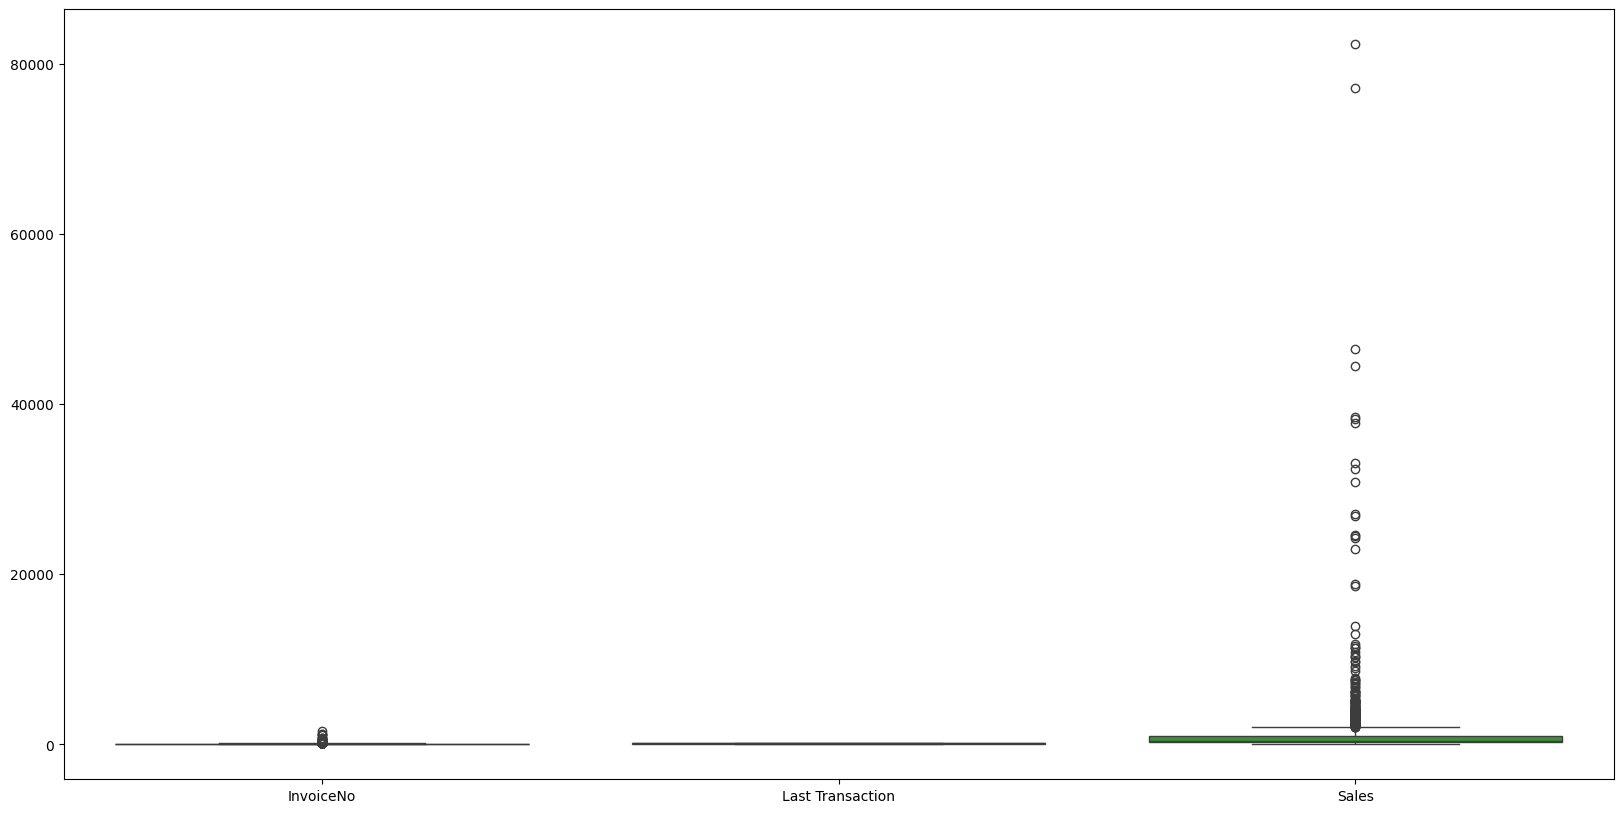

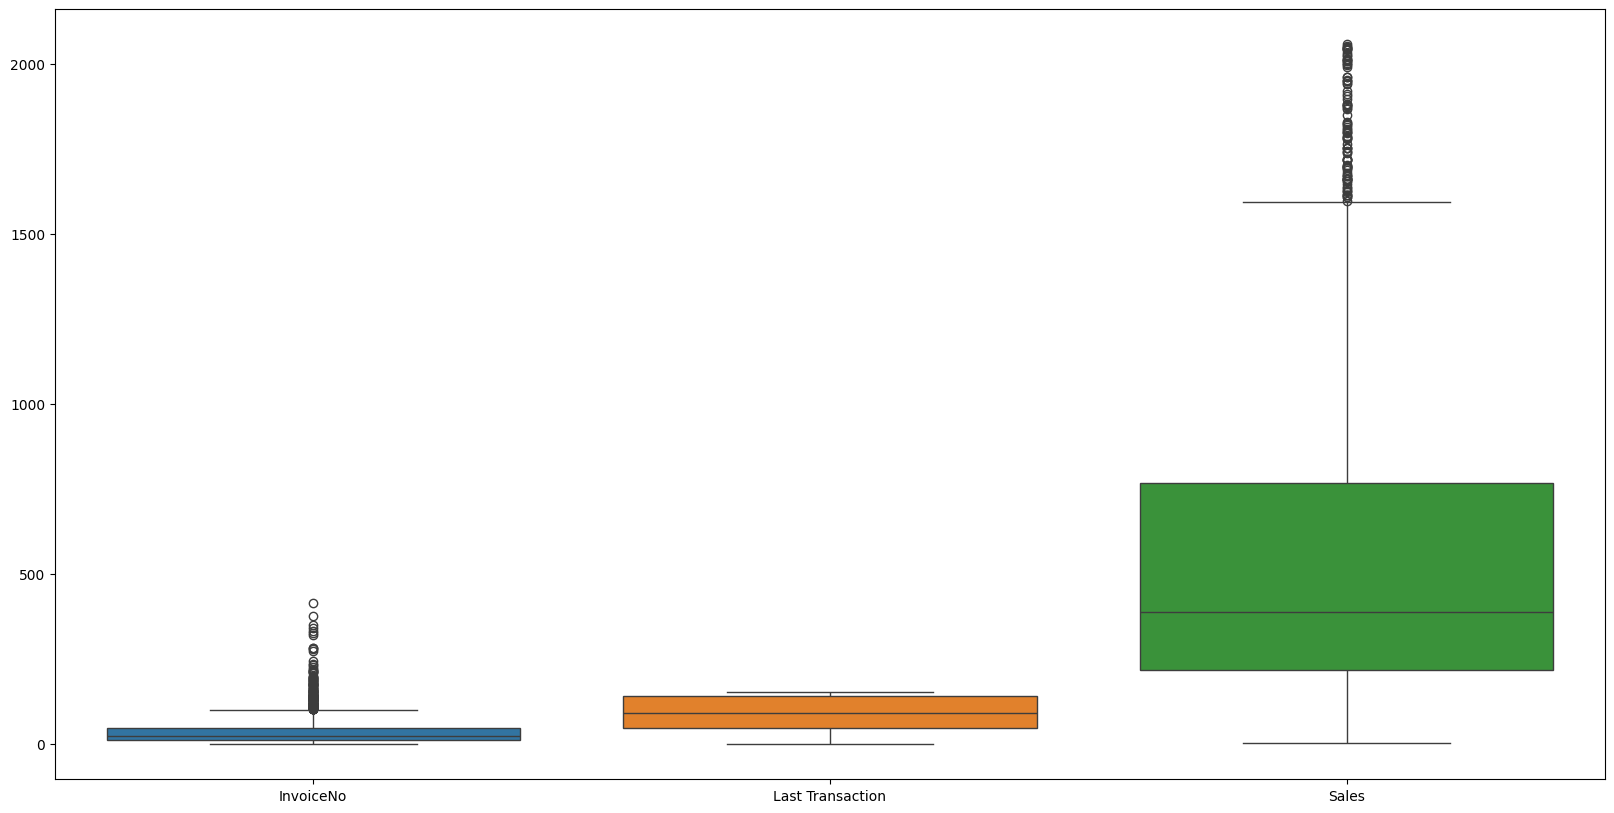

In [14]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=new_df[['InvoiceNo', 'Last Transaction', 'Sales']])
plt.show()

IQR = new_df['Sales'].quantile(0.75) - new_df['Sales'].quantile(0.25)
lower_limit = new_df['Sales'].quantile(0.25) - 1.5 * IQR
upper_limit = new_df['Sales'].quantile(0.75) + 1.5 * IQR
new_df_iqr = new_df[(new_df['Sales'] < upper_limit) & (new_df['Sales'] > lower_limit)]

plt.figure(figsize=(20, 10))
sns.boxplot(data=new_df_iqr[['InvoiceNo', 'Last Transaction', 'Sales']])
plt.show()

new_df_iqr.reset_index(drop=True, inplace=True)

In [15]:
from sklearn.preprocessing import MinMaxScaler
new2_df= new_df_iqr[['Last Transaction','InvoiceNo','Sales']]
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(new2_df)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = ['Last Transaction','InvoiceNo','Sales']
scaled_df['Country'] = new_df_iqr['Country']
scaled_df

,Last Transaction,InvoiceNo,Sales,Country
0,0.954839,0.200000,0.886343,Iceland
1,0.896774,0.065060,0.722589,Finland
2,0.587097,0.038554,0.161055,Norway
3,0.503226,0.089157,0.758911,Norway
4,0.083871,0.137349,0.523935,Spain
...,...,...,...,...
2235,0.303226,0.009639,0.052703,United Kingdom
2236,0.180645,0.130120,0.475782,United Kingdom
2237,0.251613,0.000000,0.023015,United Kingdom
2238,0.380645,0.021687,0.086141,United Kingdom


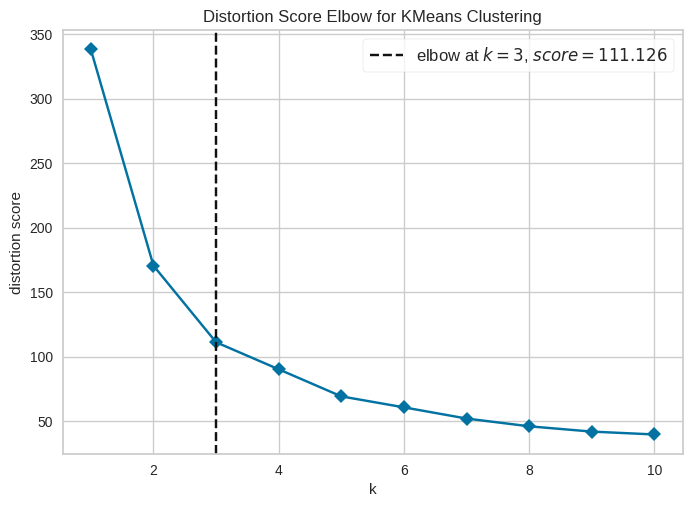

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
df_k=scaled_df.drop(columns=['Country'],axis=1)
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(df_k)        # Fit data to visualizer
visualizer.show()

In [17]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_k)
df_k['clusters']= y_predicted
df_k

,Last Transaction,InvoiceNo,Sales,clusters
0,0.954839,0.200000,0.886343,1
1,0.896774,0.065060,0.722589,1
2,0.587097,0.038554,0.161055,0
3,0.503226,0.089157,0.758911,1
4,0.083871,0.137349,0.523935,2
...,...,...,...,...
2235,0.303226,0.009639,0.052703,2
2236,0.180645,0.130120,0.475782,2
2237,0.251613,0.000000,0.023015,2
2238,0.380645,0.021687,0.086141,0


In [18]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(df_k, km.labels_, metric='euclidean')
print(score)

from sklearn.cluster import AgglomerativeClustering
hierarchial = AgglomerativeClustering(n_clusters=3)
y_predicted_hierarchial = hierarchial.fit_predict(df_k)
df_k['clusters_hierarchial']= y_predicted_hierarchial
df_k.head(30)

0.7503553437488228


,Last Transaction,InvoiceNo,Sales,clusters,clusters_hierarchial
0,0.954839,0.200000,0.886343,1,0
1,0.896774,0.065060,0.722589,1,0
2,0.587097,0.038554,0.161055,0,2
3,0.503226,0.089157,0.758911,1,0
4,0.083871,0.137349,0.523935,2,1
5,0.438710,0.021687,0.090671,0,2
6,0.496774,0.132530,0.472762,0,2
7,0.148387,0.036145,0.143861,2,1
8,0.464516,0.050602,0.310581,0,2
9,0.496774,0.045783,0.192628,0,2


In [19]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(df_k, km.labels_, metric='euclidean')
print(score)

0.8317697273926289


In [20]:
from sklearn.cluster import AgglomerativeClustering
hierarchial = AgglomerativeClustering(n_clusters=3)
y_predicted_hierarchial = hierarchial.fit_predict(df_k)
df_k['clusters_hierarchial']= y_predicted_hierarchial
df_k.head(20)

,Last Transaction,InvoiceNo,Sales,clusters,clusters_hierarchial
0,0.954839,0.200000,0.886343,1,0
1,0.896774,0.065060,0.722589,1,0
2,0.587097,0.038554,0.161055,0,1
3,0.503226,0.089157,0.758911,1,0
4,0.083871,0.137349,0.523935,2,2
5,0.438710,0.021687,0.090671,0,1
6,0.496774,0.132530,0.472762,0,1
7,0.148387,0.036145,0.143861,2,2
8,0.464516,0.050602,0.310581,0,1
9,0.496774,0.045783,0.192628,0,1


In [26]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2,min_samples = 4 )
y_predicted_dbscan = dbscan.fit_predict(df_k)
df_k['clusters_dbscan'] = y_predicted_dbscan
df_k

,Last Transaction,InvoiceNo,Sales,clusters,clusters_hierarchial,clusters_dbscan
0,0.954839,0.200000,0.886343,1,0,0
1,0.896774,0.065060,0.722589,1,0,0
2,0.587097,0.038554,0.161055,0,1,1
3,0.503226,0.089157,0.758911,1,0,0
4,0.083871,0.137349,0.523935,2,2,2
...,...,...,...,...,...,...
2235,0.303226,0.009639,0.052703,2,2,2
2236,0.180645,0.130120,0.475782,2,2,2
2237,0.251613,0.000000,0.023015,2,2,2
2238,0.380645,0.021687,0.086141,0,1,1


In [27]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(df_k, dbscan.labels_, metric='euclidean')
print(score)

0.8266718182442941
